# Projet - Real or Not? NLP with Disaster Tweets

## Project description 

* Competition - https://www.kaggle.com/c/nlp-getting-started

In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf 
import tensorflow_datasets as tfds
import pathlib 
import re

# Import English using en_core_web_sm.load()
import en_core_web_sm
nlp = en_core_web_sm.load()
import spacy

# Import english stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
# Loading the dataset
train = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Projects/Disaster_Tweets/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Projects/Disaster_Tweets/test.csv')

# Data Exploratory

In [4]:
# Returning the shape of our datasets
train.shape, test.shape

((7613, 5), (3263, 4))

In [5]:
# Returning the percentage of missing values
train.isnull().sum() * 100 / len(train)

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [6]:
# Returning the percentage of missing values
test.isnull().sum() * 100 / len(test)

id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64

In [7]:
# Returning the type of elements of each columng
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [8]:
# Returning the type of elements of each columng
test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [9]:
# Returning the unique values for the feature 'keyword'
train['keyword'].value_counts()[:20]

fatalities     45
armageddon     42
deluge         42
damage         41
sinking        41
body%20bags    41
harm           41
outbreak       40
evacuate       40
twister        40
siren          40
windstorm      40
fear           40
collided       40
sinkhole       39
wreckage       39
sunk           39
wrecked        39
whirlwind      39
derailment     39
Name: keyword, dtype: int64

In [10]:
# Percentage of each element of target column on our dataset
train['target'].value_counts()/ len(train)

0    0.57034
1    0.42966
Name: target, dtype: float64

In [11]:
# Returning the unique values for the feature 'keyword' on test dataset
test['keyword'].value_counts()[:20]

deluged               23
rubble                22
demolished            22
annihilation          21
obliteration          21
first%20responders    21
sirens                21
snowstorm             21
seismic               21
bioterrorism          20
catastrophic          20
dead                  20
survivors             20
avalanche             20
mayhem                20
terrorist             19
devastated            19
trauma                19
wild%20fires          19
obliterate            19
Name: keyword, dtype: int64

In [12]:
# Returning 5 first rows
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [13]:
# Returning 5 first rows
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Imputing missing values

In [14]:
# Removing the 'location' feature
train = train.drop(['location'], axis = 1)
test = test.drop(['location'], axis = 1)

In [15]:
# Removing the missing values
train = train.dropna(subset=['keyword'])
test = test.dropna(subset=['keyword'])

In [16]:
# Returning number of missing values
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

## Tokenize

In [17]:
# Making everything in lowercase
train["cleaned_text"] = train["text"].str.lower().str.split()

train.head()

,id,keyword,text,target,cleaned_text
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,"[@bbcmtd, wholesale, markets, ablaze, http://t..."
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,"[we, always, try, to, bring, the, heavy., #met..."
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,"[#africanbaze:, breaking, news:nigeria, flag, ..."
34,52,ablaze,Crying out for more! Set me ablaze,0,"[crying, out, for, more!, set, me, ablaze]"
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,"[on, plus, side, look, at, the, sky, last, nig..."


As we see our text column contains symbols like #, @. These symbols will not be removed since they could help our model to recognize a disaster even though a relevant word is being used.

In [18]:
# Removing punctuation but not 'hashtag' and '@' symbols
train['cleaned_text'] = train['cleaned_text'].apply(lambda x:' '.join(ch for ch in x if ch.isalnum() or ch.startswith('#') or ch.startswith('@')))
train.head()

,id,keyword,text,target,cleaned_text
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,@bbcmtd wholesale markets ablaze
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the #metal #rt
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,#africanbaze: breaking flag set ablaze in
34,52,ablaze,Crying out for more! Set me ablaze,0,crying out for set me ablaze
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...


In [19]:
# Removing stop-words
train["cleaned_text"] = train["cleaned_text"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if token.lemma_ not in STOP_WORDS]))
train.head(20)

,id,keyword,text,target,cleaned_text
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,@bbcmtd wholesale market ablaze
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,-PRON- try bring # metal # rt
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,# africanbaze : break flag set ablaze
34,52,ablaze,Crying out for more! Set me ablaze,0,cry set -PRON- ablaze
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus look sky night -PRON- ablaze
36,54,ablaze,@PhDSquares #mufc they've built so much hype a...,0,@phdsquares # mufc build hype new acquisition ...
37,55,ablaze,INEC Office in Abia Set Ablaze - http://t.co/3...,1,inec office abia set ablaze
38,56,ablaze,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,barbados # bridgetown jamaica car set santa cr...
39,57,ablaze,Ablaze for you Lord :D,0,ablaze -PRON- lord
40,59,ablaze,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,check # nsfw


In [20]:
# Creating a tokenizer instance
token = tf.keras.preprocessing.text.Tokenizer()

In [21]:
# Fitting the tokenizer on texts
token.fit_on_texts(train['text'])

In [22]:
# Attributes of tokenizer
token.word_index

{'t': 1,
 'co': 2,
 'http': 3,
 'the': 4,
 'a': 5,
 'in': 6,
 'to': 7,
 'of': 8,
 'and': 9,
 'i': 10,
 'is': 11,
 'for': 12,
 'on': 13,
 'you': 14,
 'my': 15,
 'with': 16,
 'it': 17,
 'that': 18,
 'at': 19,
 'by': 20,
 'this': 21,
 'from': 22,
 'https': 23,
 'be': 24,
 'are': 25,
 'was': 26,
 'have': 27,
 'like': 28,
 'amp': 29,
 'as': 30,
 'me': 31,
 'up': 32,
 'but': 33,
 'just': 34,
 'so': 35,
 'not': 36,
 'your': 37,
 'out': 38,
 'no': 39,
 'will': 40,
 'all': 41,
 'after': 42,
 'has': 43,
 'an': 44,
 'fire': 45,
 'when': 46,
 "i'm": 47,
 'if': 48,
 'get': 49,
 'we': 50,
 'new': 51,
 'now': 52,
 'via': 53,
 '2': 54,
 'more': 55,
 'about': 56,
 'or': 57,
 'news': 58,
 'they': 59,
 'one': 60,
 'he': 61,
 'people': 62,
 'how': 63,
 'what': 64,
 'been': 65,
 'over': 66,
 'who': 67,
 "it's": 68,
 "don't": 69,
 'into': 70,
 'do': 71,
 'video': 72,
 "'": 73,
 'can': 74,
 'emergency': 75,
 'disaster': 76,
 'there': 77,
 'police': 78,
 'than': 79,
 '3': 80,
 'her': 81,
 'u': 82,
 'would': 8

In [23]:
# Encoding the words of the text
train['tokenized_text'] = token.texts_to_sequences(train['cleaned_text'])
train.head()

,id,keyword,text,target,cleaned_text,tokenized_text
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,@bbcmtd wholesale market ablaze,"[6920, 2910, 548, 638]"
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,-PRON- try bring # metal # rt,"[894, 988, 1213, 102]"
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,# africanbaze : break flag set ablaze,"[6923, 1091, 825, 265, 638]"
34,52,ablaze,Crying out for more! Set me ablaze,0,cry set -PRON- ablaze,"[2344, 265, 638]"
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus look sky night -PRON- ablaze,"[1743, 167, 1100, 252, 638]"


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


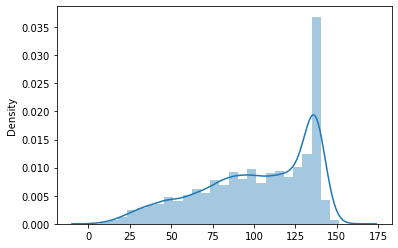

In [24]:
# Plotting the distribution of our vocabulary
sns.distplot([len(i) for i in train['text']])

The biggest length of a tweet is with 150 words, so we will set this as the maximum length of the pad sequences.

In [25]:
# Creating pad sequence for every tweet
text_pad = tf.keras.preprocessing.sequence.pad_sequences(train["tokenized_text"], padding="post", maxlen = 150)

In [26]:
# Returing the shape of the pad sequence 
text_pad.shape

(7552, 150)

In [27]:
# First element of the pad sequence
text_pad[0]

array([6920, 2910,  548,  638,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [30]:
# Creating tensor dataset
df = tf.data.Dataset.from_tensor_slices((text_pad, train.target.values))

In [31]:
BATCH_SIZE = 32
TAKE_SIZE = int(len(train["target"])*0.8)

# Shuffeling the dataset
df = df.shuffle(len(train["target"]))

# Splitting in train and test set
train_data = df.take(TAKE_SIZE)
train_data = train_data.batch(BATCH_SIZE)

test_data = df.skip(TAKE_SIZE)
test_data = test_data.batch(BATCH_SIZE)

In [32]:
# Let's look at a batch
for text, target in train_data.take(1):
  print(text)

tf.Tensor(
[[2502  383 2783 ...    0    0    0]
 [ 372 5641  178 ...    0    0    0]
 [2337 2433    0 ...    0    0    0]
 ...
 [  51  714 1708 ...    0    0    0]
 [ 113  651  230 ...    0    0    0]
 [ 622  649    0 ...    0    0    0]], shape=(32, 150), dtype=int32)


#Modeling

In [33]:
# Returning size of vocabulary
vocab_size = len(token.word_index)
print(vocab_size)

22653


In [40]:
maxlen = 150
embedding_dim = 100


model = tf.keras.Sequential([
                             
                  # Input Layer Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_shape=[text.shape[-1],], input_length = maxlen),

                  # Layer LSTM 
                  tf.keras.layers.LSTM(128, return_sequences = True),

                  # Dropout Layer
                  tf.keras.layers.Dropout(0.2),
                  # Faltten Layer
                  tf.keras.layers.Flatten(),

                  # Dense Layers
                  tf.keras.layers.Dense(64, activation = 'relu'),
                  tf.keras.layers.Dense(32, activation = 'relu'),
                  tf.keras.layers.Dense(16, activation = 'relu'),

                  # Output layer
                  tf.keras.layers.Dense(1, activation="sigmoid")
])
                    

In [41]:
# Printing the summary of our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 100)          2265400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 128)          117248    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150, 128)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1228864   
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)               

In [42]:
# Creating a learning_rate_schedule 
initial_learning_rate = 0.001

# Adam optimiser
optimizer= tf.keras.optimizers.Adam(
    learning_rate = initial_learning_rate
)

# Compiling model with the cost function.
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [43]:
# Model training
history = model.fit(train_data,
                    epochs=20,
                    validation_data=test_data)

Epoch 1/20
189/189 [==============================] - 9s 38ms/step - loss: 0.5719 - binary_accuracy: 0.6938 - val_loss: 0.3671 - val_binary_accuracy: 0.8451
Epoch 2/20
189/189 [==============================] - 7s 38ms/step - loss: 0.3619 - binary_accuracy: 0.8465 - val_loss: 0.2461 - val_binary_accuracy: 0.9093
Epoch 3/20
189/189 [==============================] - 7s 37ms/step - loss: 0.2402 - binary_accuracy: 0.9075 - val_loss: 0.1487 - val_binary_accuracy: 0.9437
Epoch 4/20
189/189 [==============================] - 7s 37ms/step - loss: 0.1844 - binary_accuracy: 0.9349 - val_loss: 0.1144 - val_binary_accuracy: 0.9570
Epoch 5/20
189/189 [==============================] - 7s 37ms/step - loss: 0.1395 - binary_accuracy: 0.9520 - val_loss: 0.1008 - val_binary_accuracy: 0.9669
Epoch 6/20
189/189 [==============================] - 7s 37ms/step - loss: 0.1198 - binary_accuracy: 0.9589 - val_loss: 0.0882 - val_binary_accuracy: 0.9643
Epoch 7/20
189/189 [==============================] - 7s 3

Our model is performing really well. 

We can have a better look by making the visualisation of accuracy on the training and validation datasets over training epochs, and of loss on the training and validation datasets over training epochs.

## Model Evaluation 

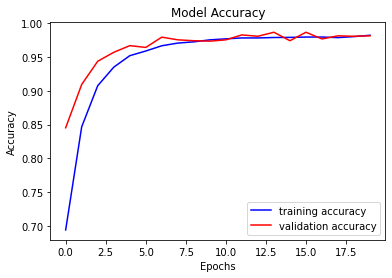

In [44]:
# Visualization of training on accuracy
plt.plot(history.history['binary_accuracy'], color='b')
plt.plot(history.history['val_binary_accuracy'],color='r')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

From the plot of accuracy we can see that the model is performing very well. We can also notice that the model has not over-learned the training dataset, showing comparable skill on both datasets, although we could try more epochs and see if there is any difference.

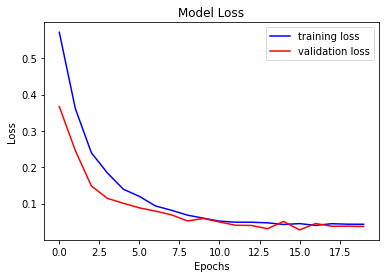

In [46]:
# Visualization of the training process on the loss function

plt.plot(history.history['loss'], color="b")
plt.plot(history.history['val_loss'], color="r")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

The loss decreases very rapidly in the beginning, to decrease only lightly when the number of epochs increases. This is normal and is a good sign.
Our model is not overfitting to the data.

# Test dataset

In [47]:
# Returning the 5 first rows
test.head()

,id,keyword,text
15,46,ablaze,Birmingham Wholesale Market is ablaze BBC News...
16,47,ablaze,@sunkxssedharry will you wear shorts for race ...
17,51,ablaze,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriag...
18,58,ablaze,Check these out: http://t.co/rOI2NSmEJJ http:/...
19,60,ablaze,PSA: IÛªm splitting my personalities.\n\n?? t...


In [48]:
# Making everything in lowercase
test["cleaned_text"] = test["text"].str.lower().str.split()

# Removing punctuation and '#' and '@' symbols
test['cleaned_text'] = test['cleaned_text'].apply(lambda x:' '.join(ch for ch in x if ch.isalnum() or ch.startswith('#') or ch.startswith('@')))

# Removing stop-words
test["cleaned_text"] = test["cleaned_text"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if token.lemma_ not in STOP_WORDS]))

test.head()

,id,keyword,text,cleaned_text
15,46,ablaze,Birmingham Wholesale Market is ablaze BBC News...,birmingham wholesale market ablaze bbc news fi...
16,47,ablaze,@sunkxssedharry will you wear shorts for race ...,@sunkxssedharry -PRON- wear short race ablaze
17,51,ablaze,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriag...,# previouslyondoyintv : toke marriage crisis s...
18,58,ablaze,Check these out: http://t.co/rOI2NSmEJJ http:/...,check # nsfw
19,60,ablaze,PSA: IÛªm splitting my personalities.\n\n?? t...,split -PRON- techie follow @ablaze_co burner f...


In [49]:
# Fitting the tokenizer on texts
token.fit_on_texts(test['text'])

In [50]:
# Encoding the words of the text
test['tokenized_text'] = token.texts_to_sequences(test['cleaned_text'])
test.head()

,id,keyword,text,cleaned_text,tokenized_text
15,46,ablaze,Birmingham Wholesale Market is ablaze BBC News...,birmingham wholesale market ablaze bbc news fi...,"[5510, 2823, 438, 610, 804, 59, 43, 1020, 2823..."
16,47,ablaze,@sunkxssedharry will you wear shorts for race ...,@sunkxssedharry -PRON- wear short race ablaze,"[22999, 2829, 1166, 3485, 610]"
17,51,ablaze,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriag...,# previouslyondoyintv : toke marriage crisis s...,"[23000, 23001, 8323, 770, 279, 1066, 515]"
18,58,ablaze,Check these out: http://t.co/rOI2NSmEJJ http:/...,check # nsfw,"[290, 2827]"
19,60,ablaze,PSA: IÛªm splitting my personalities.\n\n?? t...,split -PRON- techie follow @ablaze_co burner f...,"[3834, 835, 610, 2, 17397, 835, 610]"


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


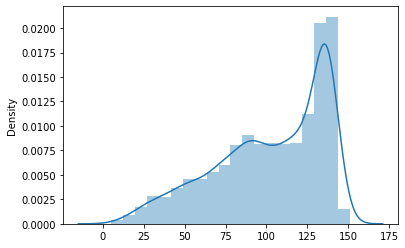

In [51]:
sns.distplot([len(i) for i in test['text']])

The biggest length of a tweet is just under 150 words, so we will set 150 as the maximum length of the pad sequences.

In [52]:
# Creating pad sequence for every tweet
text_pad = tf.keras.preprocessing.sequence.pad_sequences(test["tokenized_text"], padding="post", maxlen = 150)

In [53]:
# Returning the shape of the pad text
text_pad.shape

(3237, 150)

In [54]:
# First element of the pad sequence
text_pad[0]

array([5510, 2823,  438,  610,  804,   59,   43, 1020, 2823,  438,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

The results where evaluated by Jedha. The acuracy of the train set calculates at 97.8%.